F1 Debris Detection

In [1]:
!nvidia-smi

Tue Mar 18 16:07:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wxJuGiYAjwoo2toqp9ui")
project = rf.workspace("will-newbould-nnxbu").project("debris-detection-rl8s0")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Debris-Detection-5 in yolov11:: 100%|██████████| 11242/11242 [00:02<00:00, 4757.10it/s]


In [6]:
dataset.location

'/content/Debris-Detection-5'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=1080

100% 5.35M/5.35M [00:00<00:00, 310MB/s]
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Debris-Detection-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1080, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

**Step # 05 Examine Training Results**

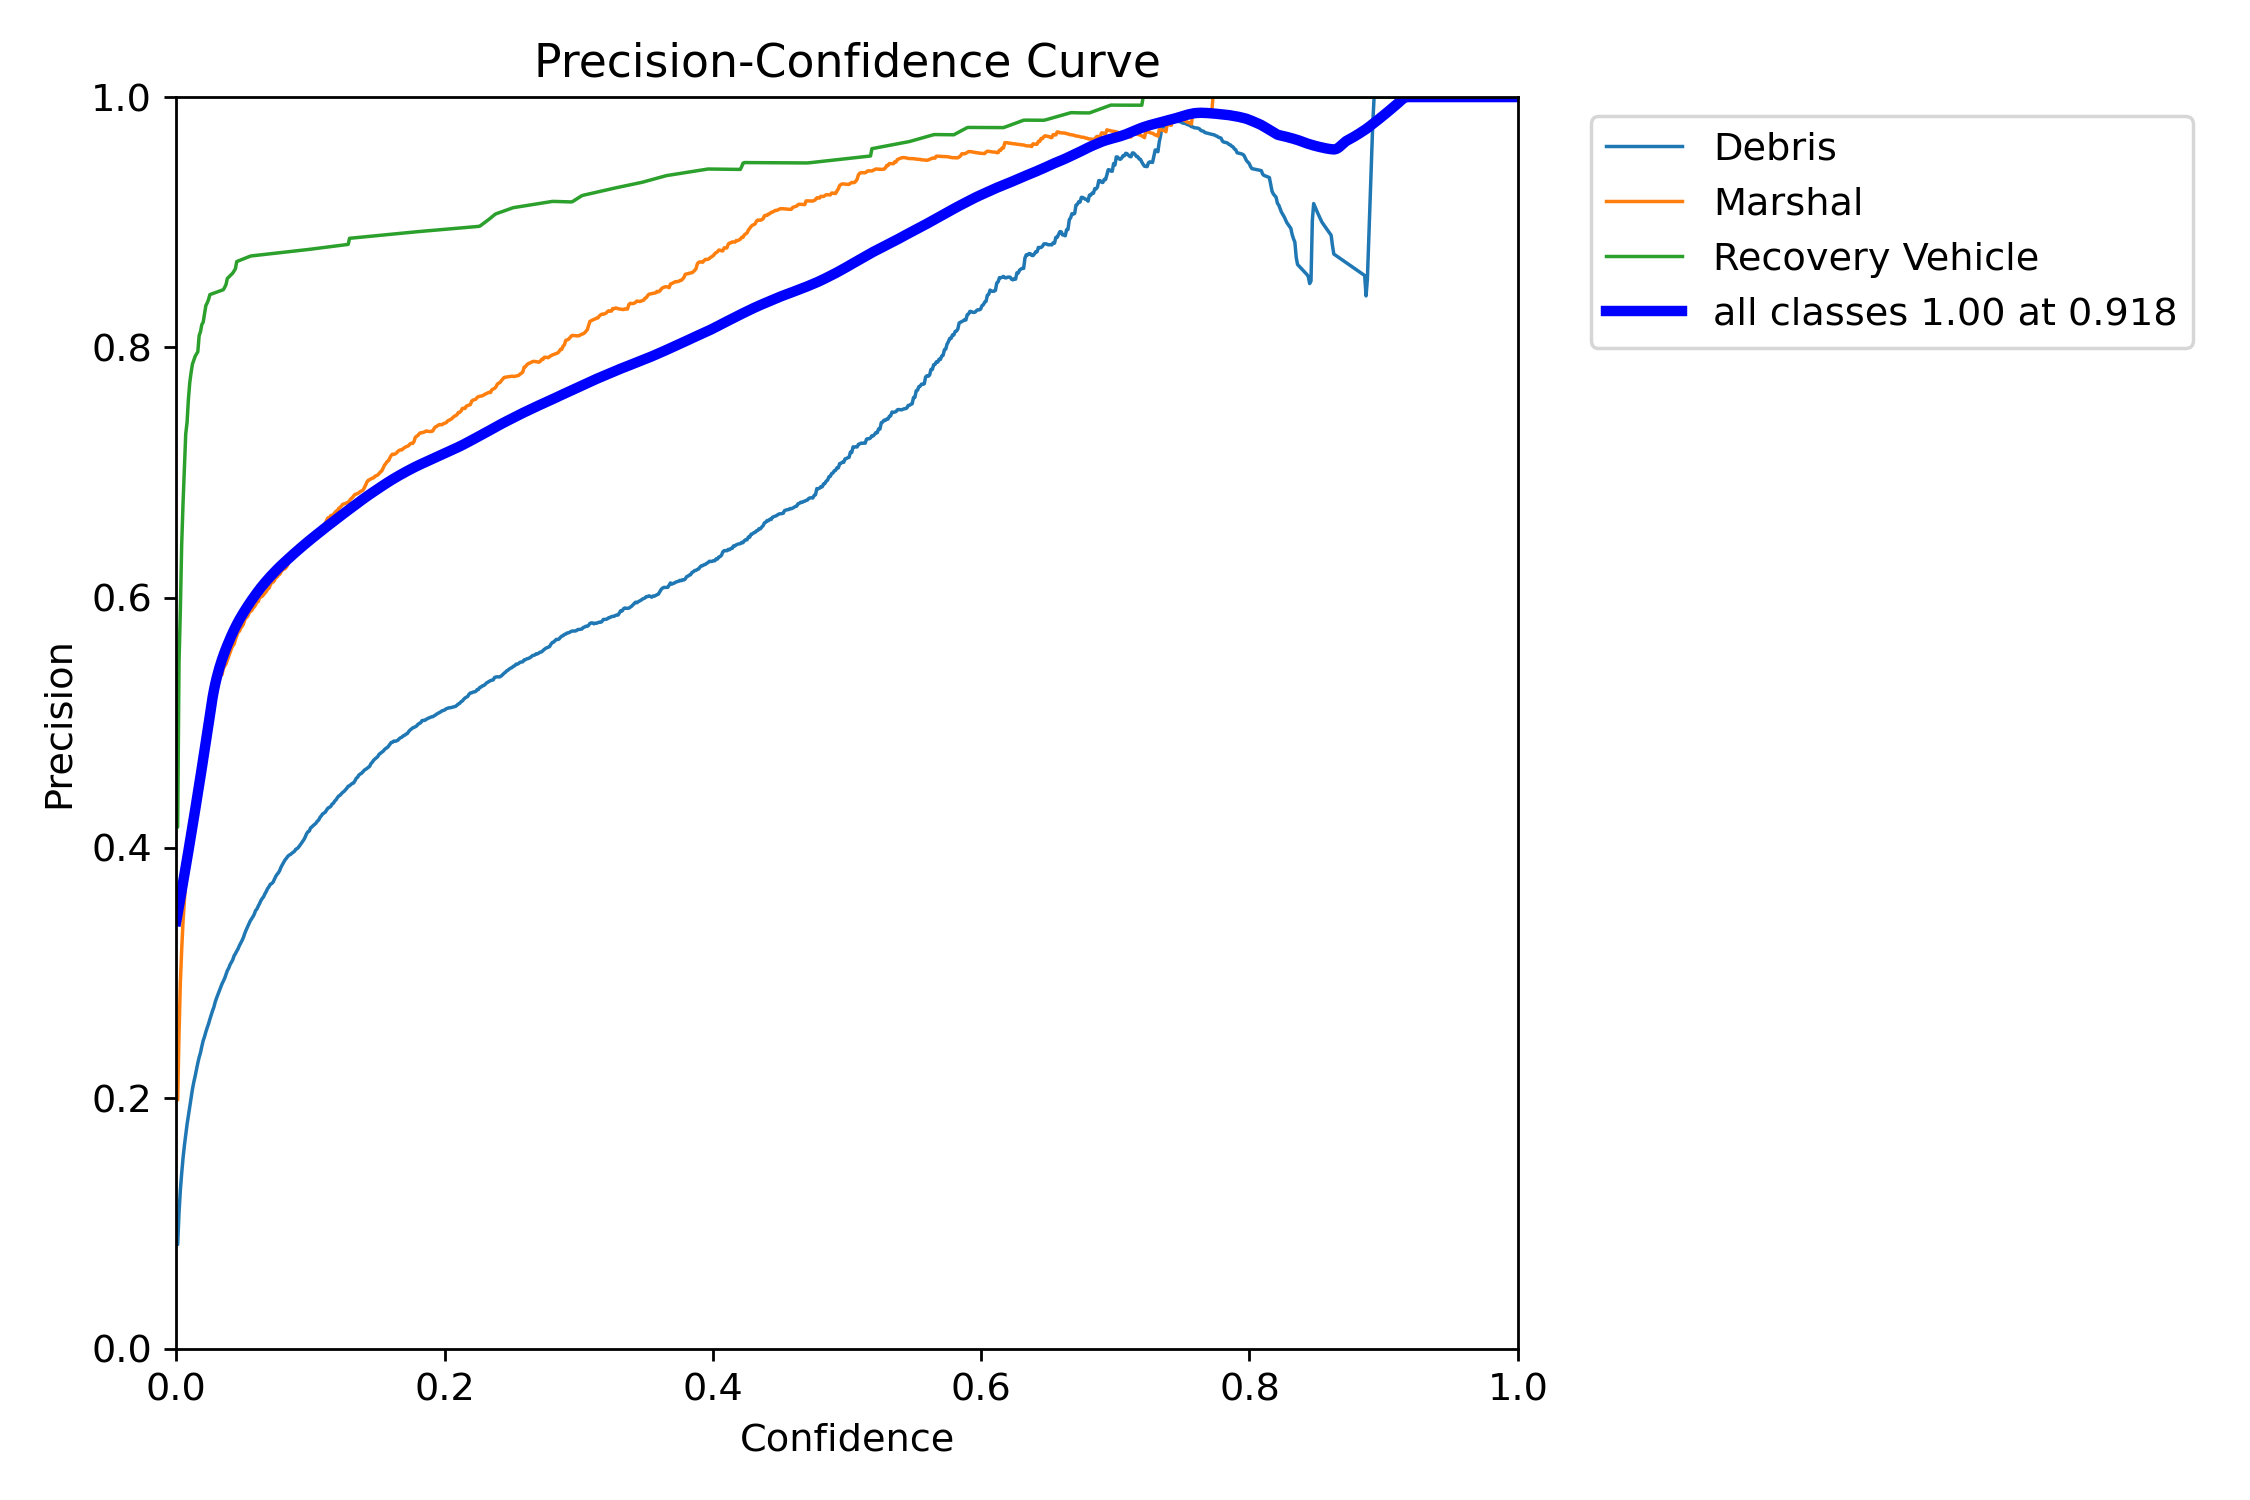

In [8]:
Image("/content/runs/detect/train/P_curve.png", width=600)

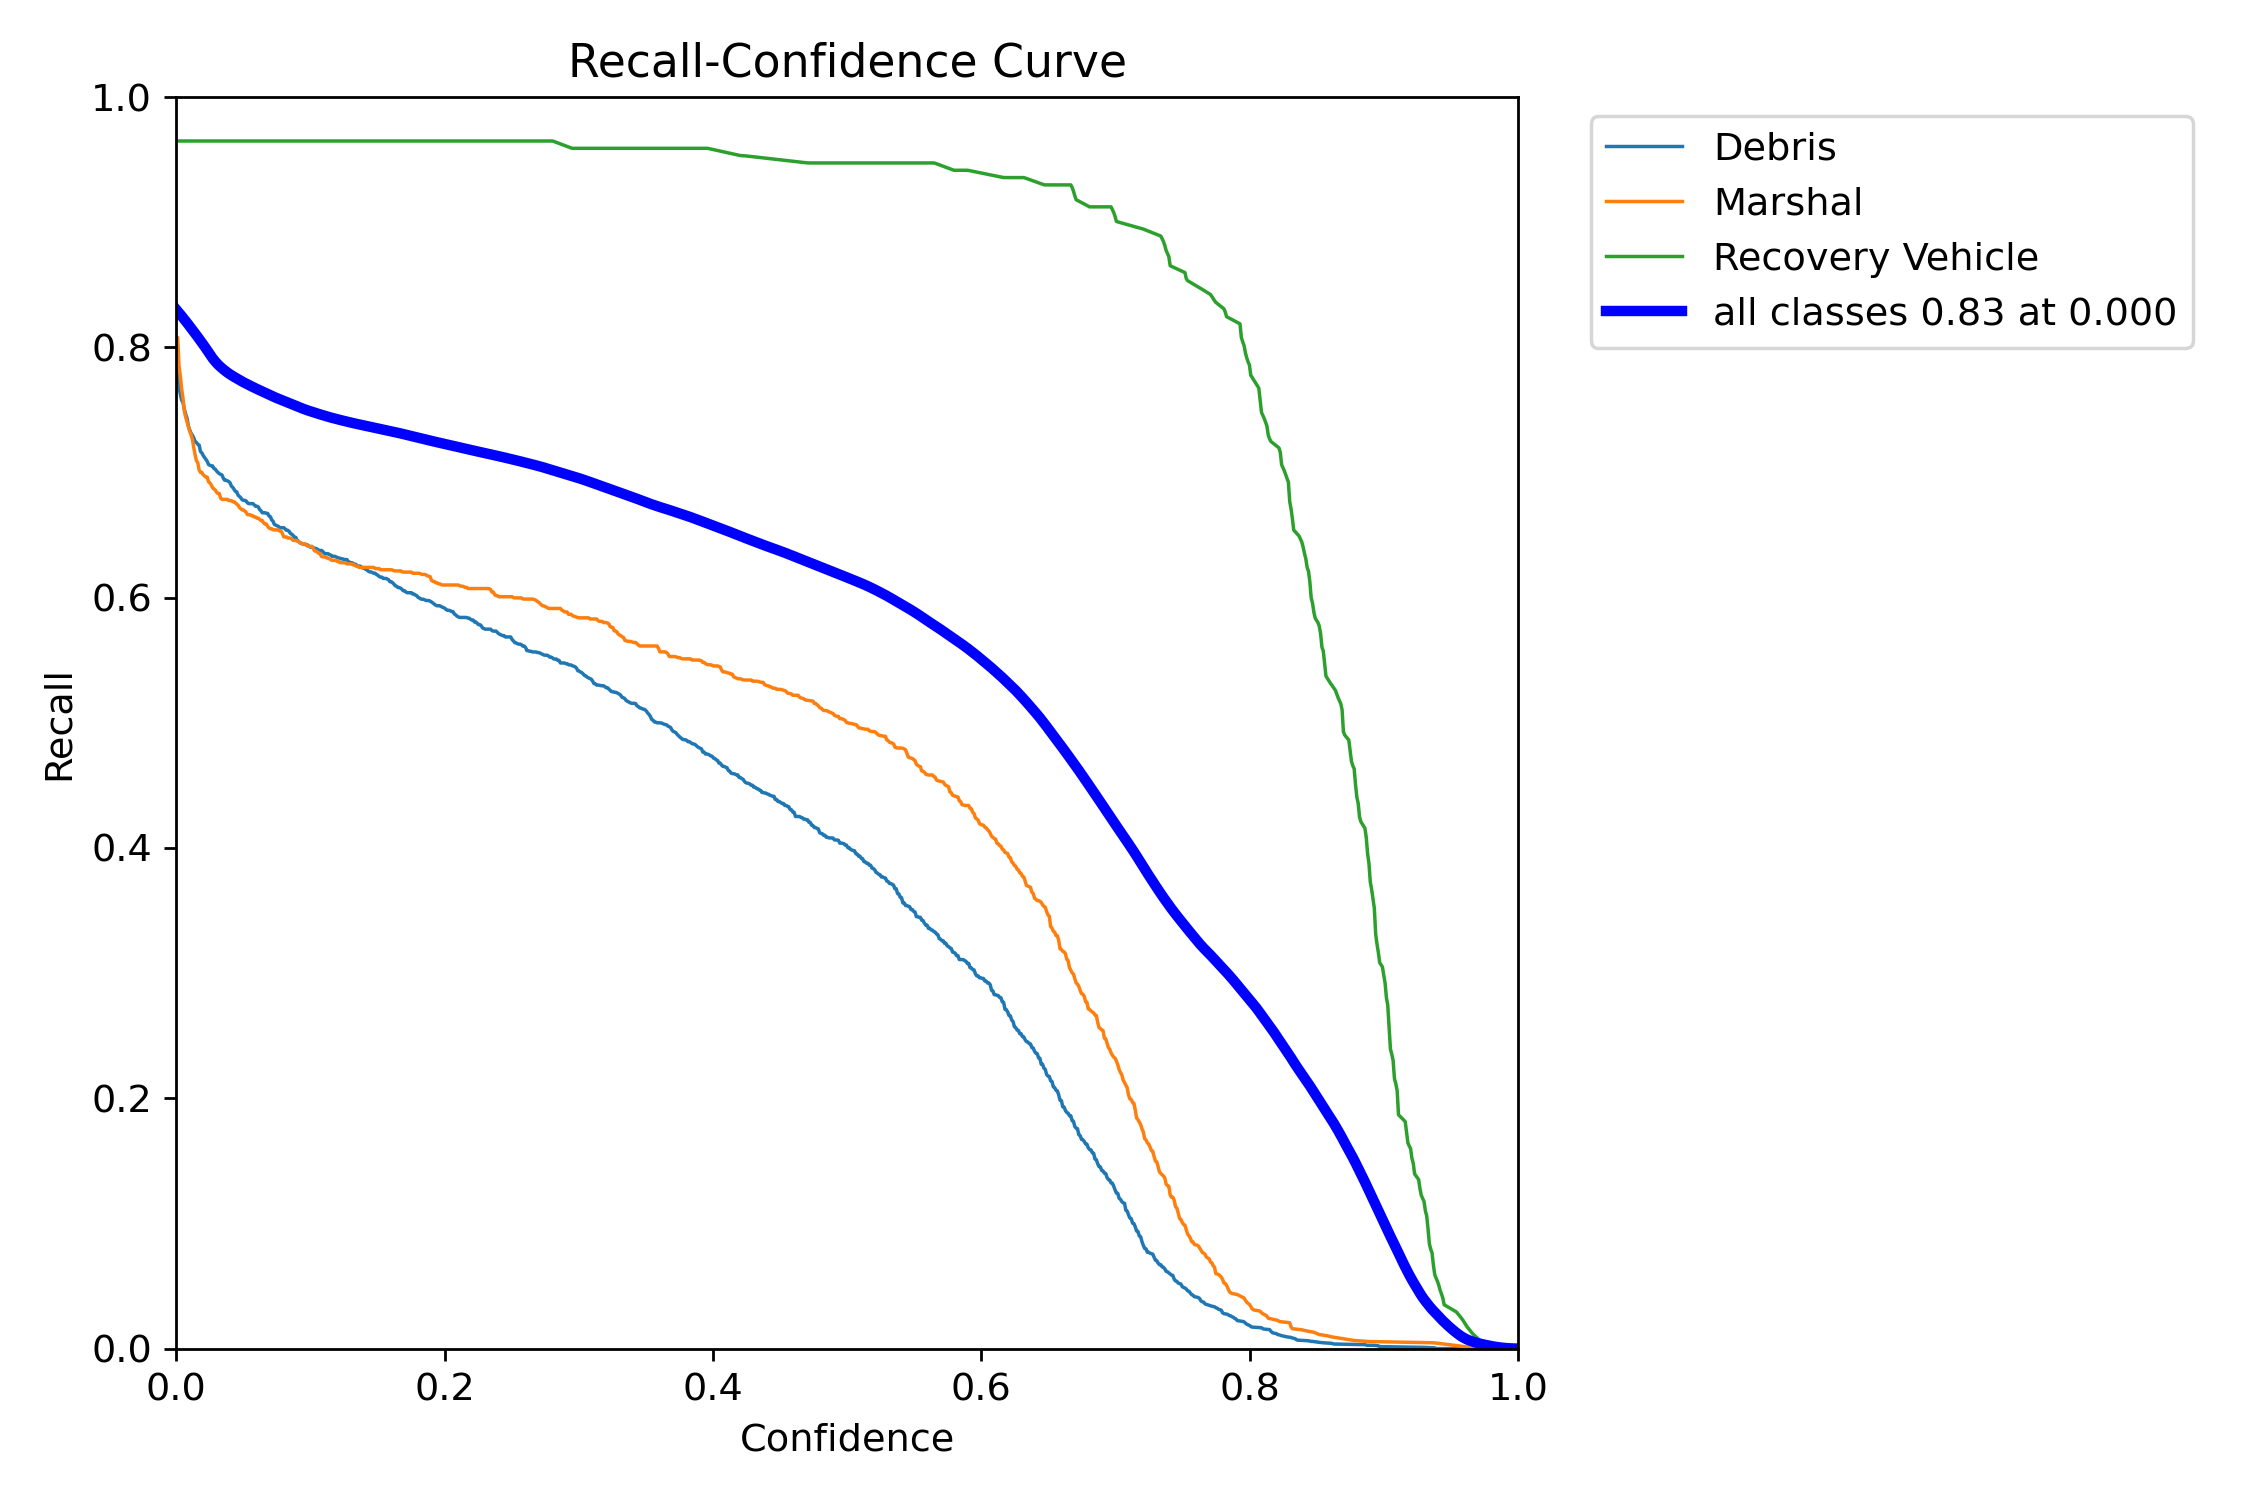

In [9]:
Image("/content/runs/detect/train/R_curve.png", width=600)

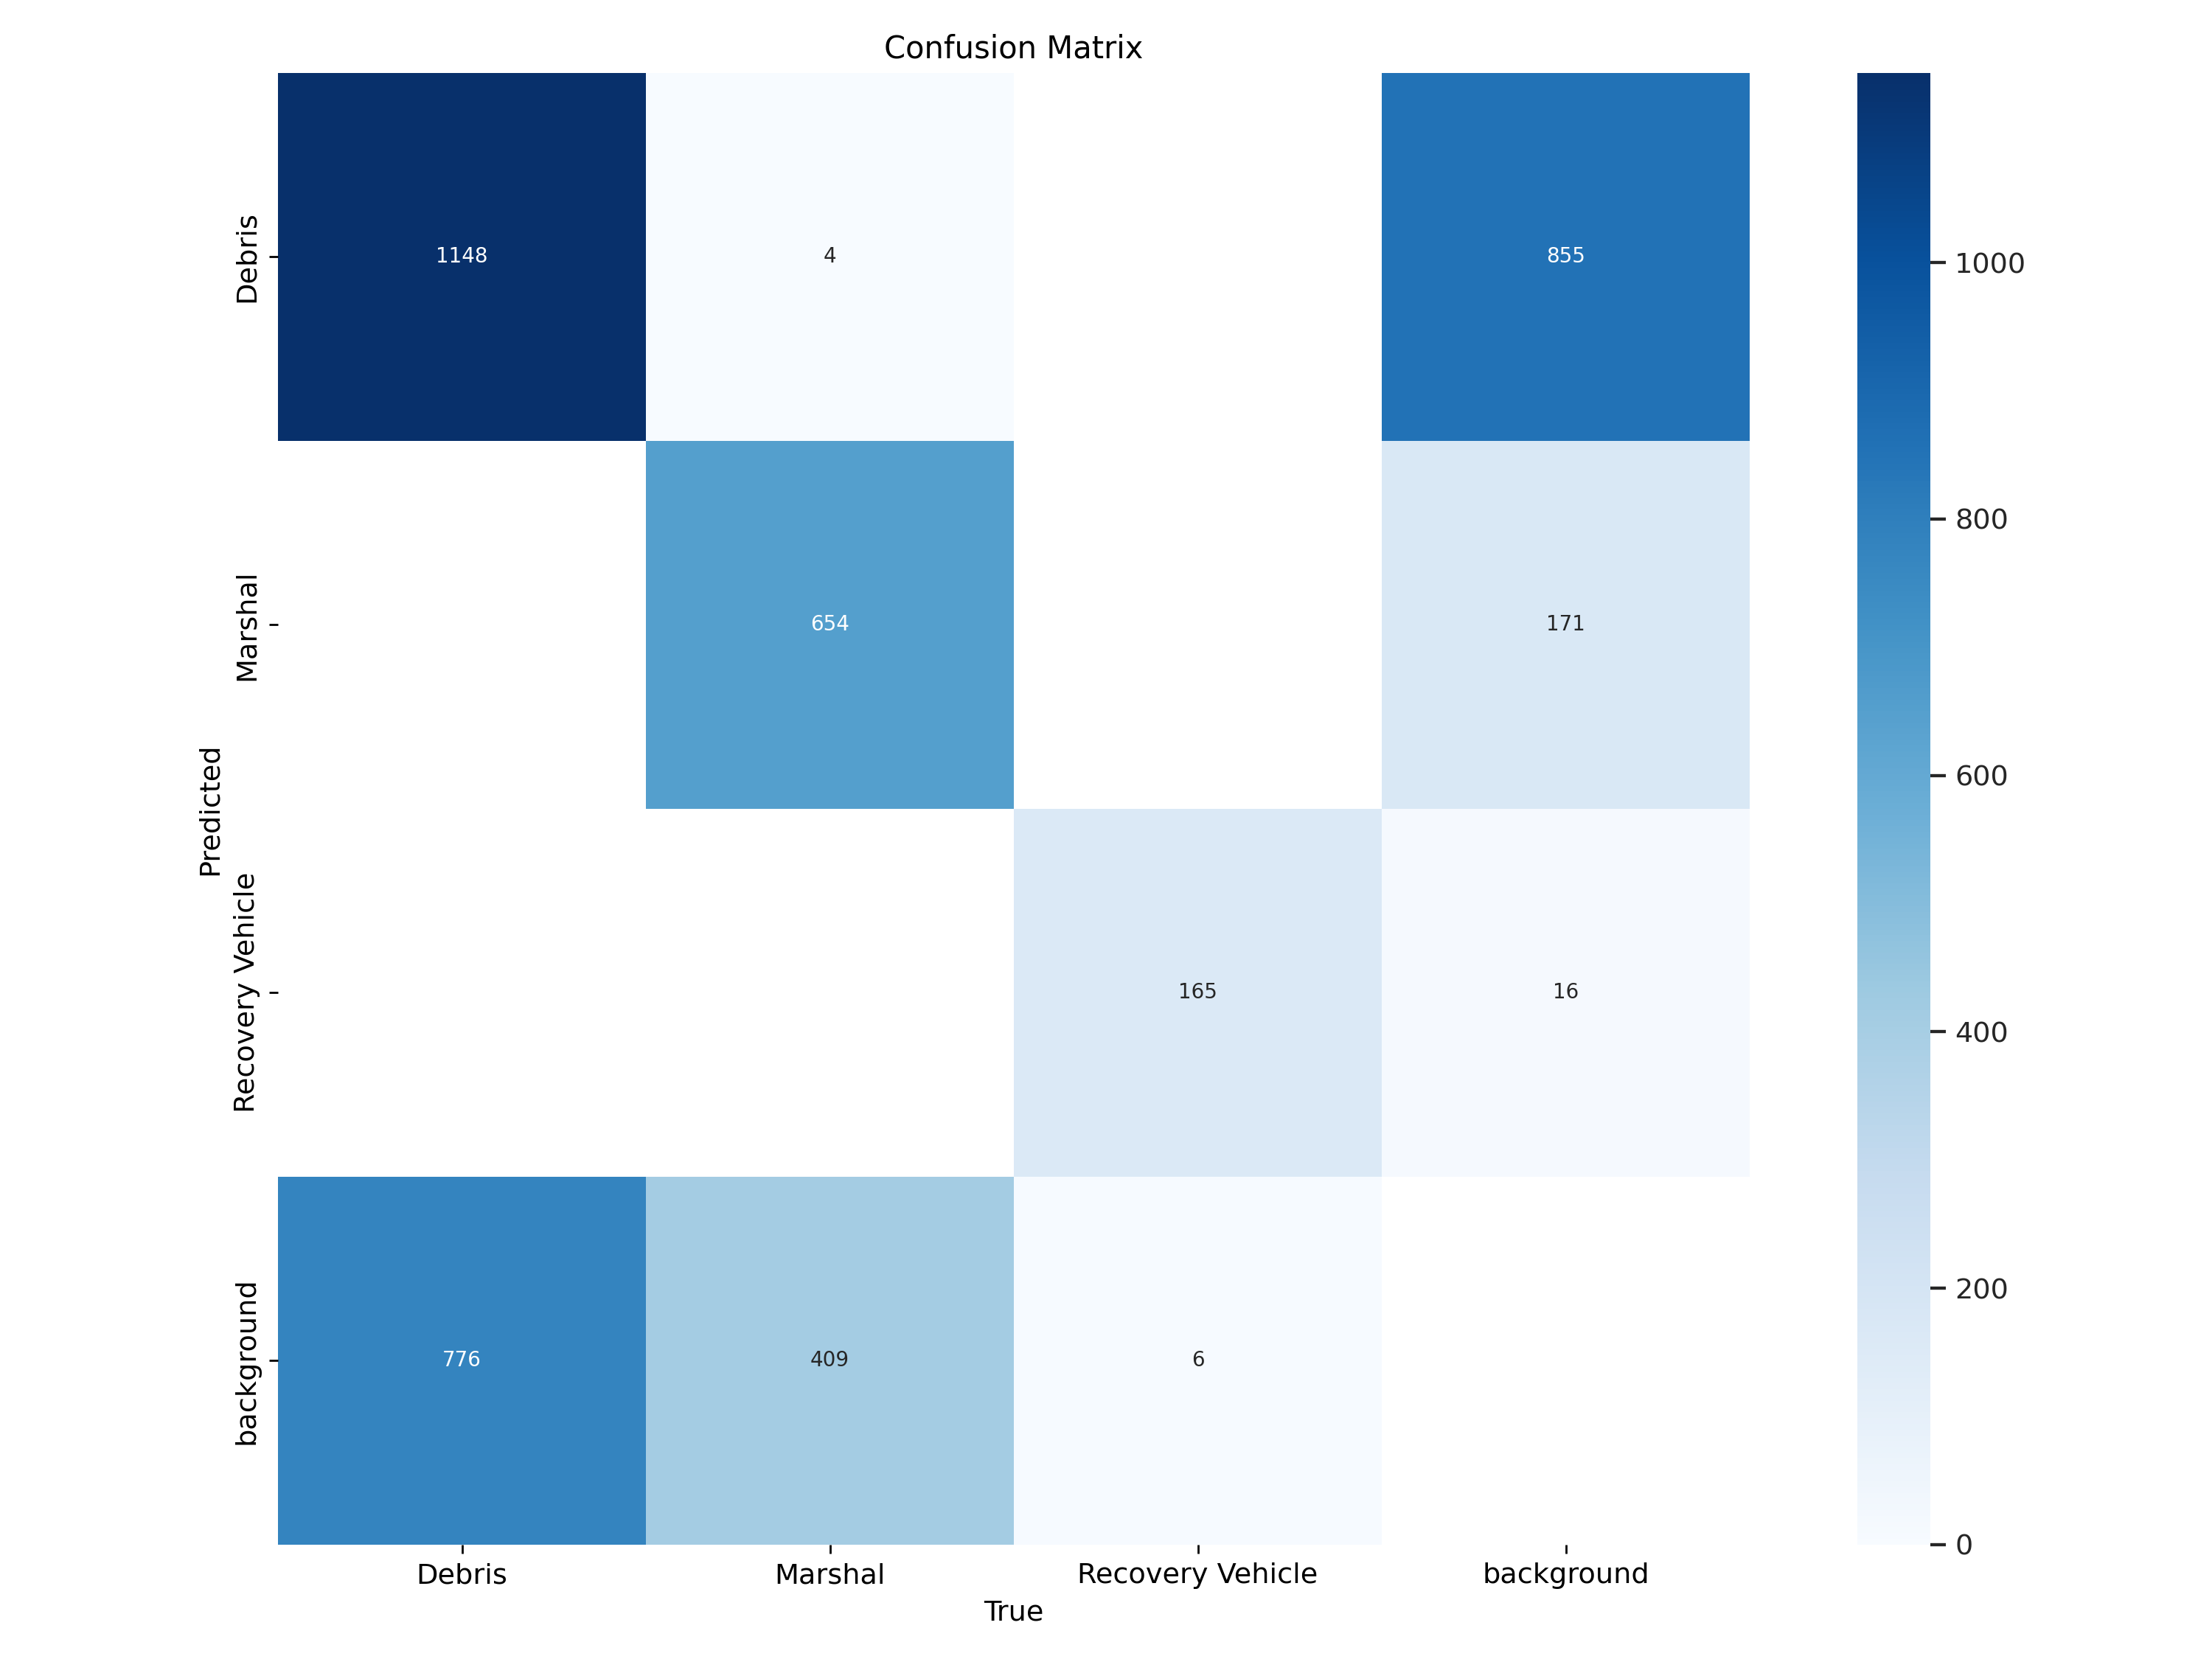

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

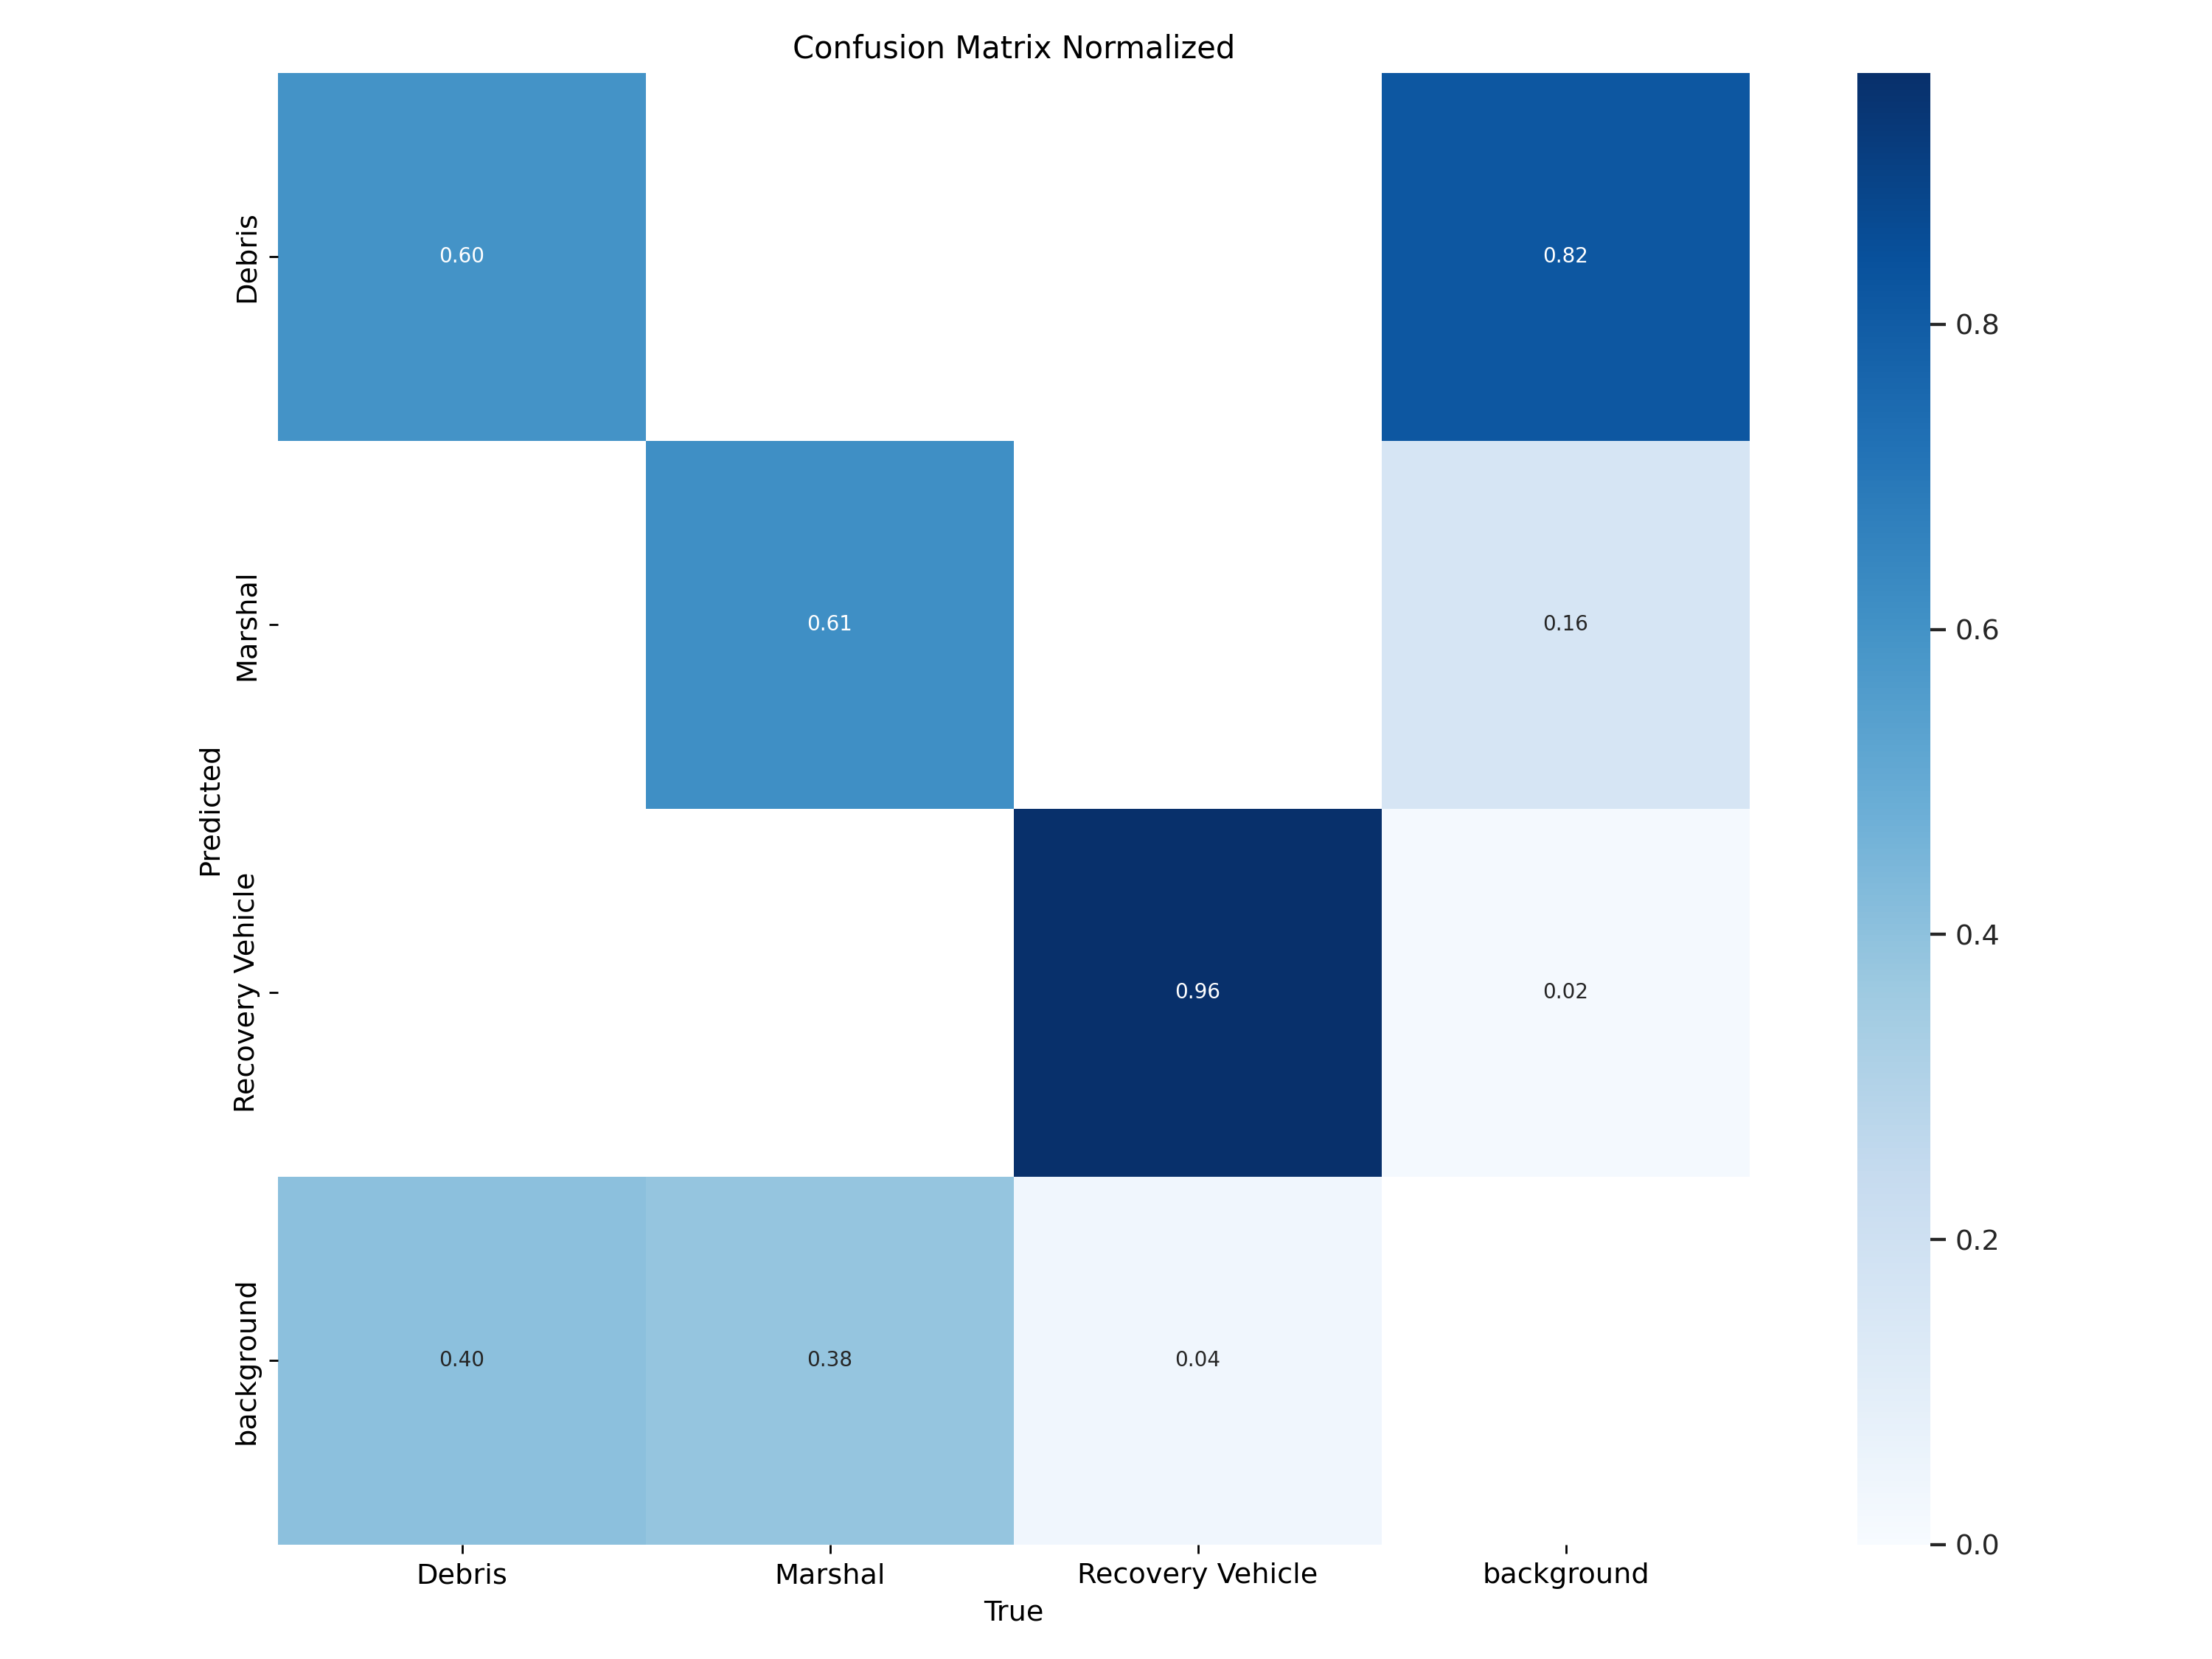

In [11]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

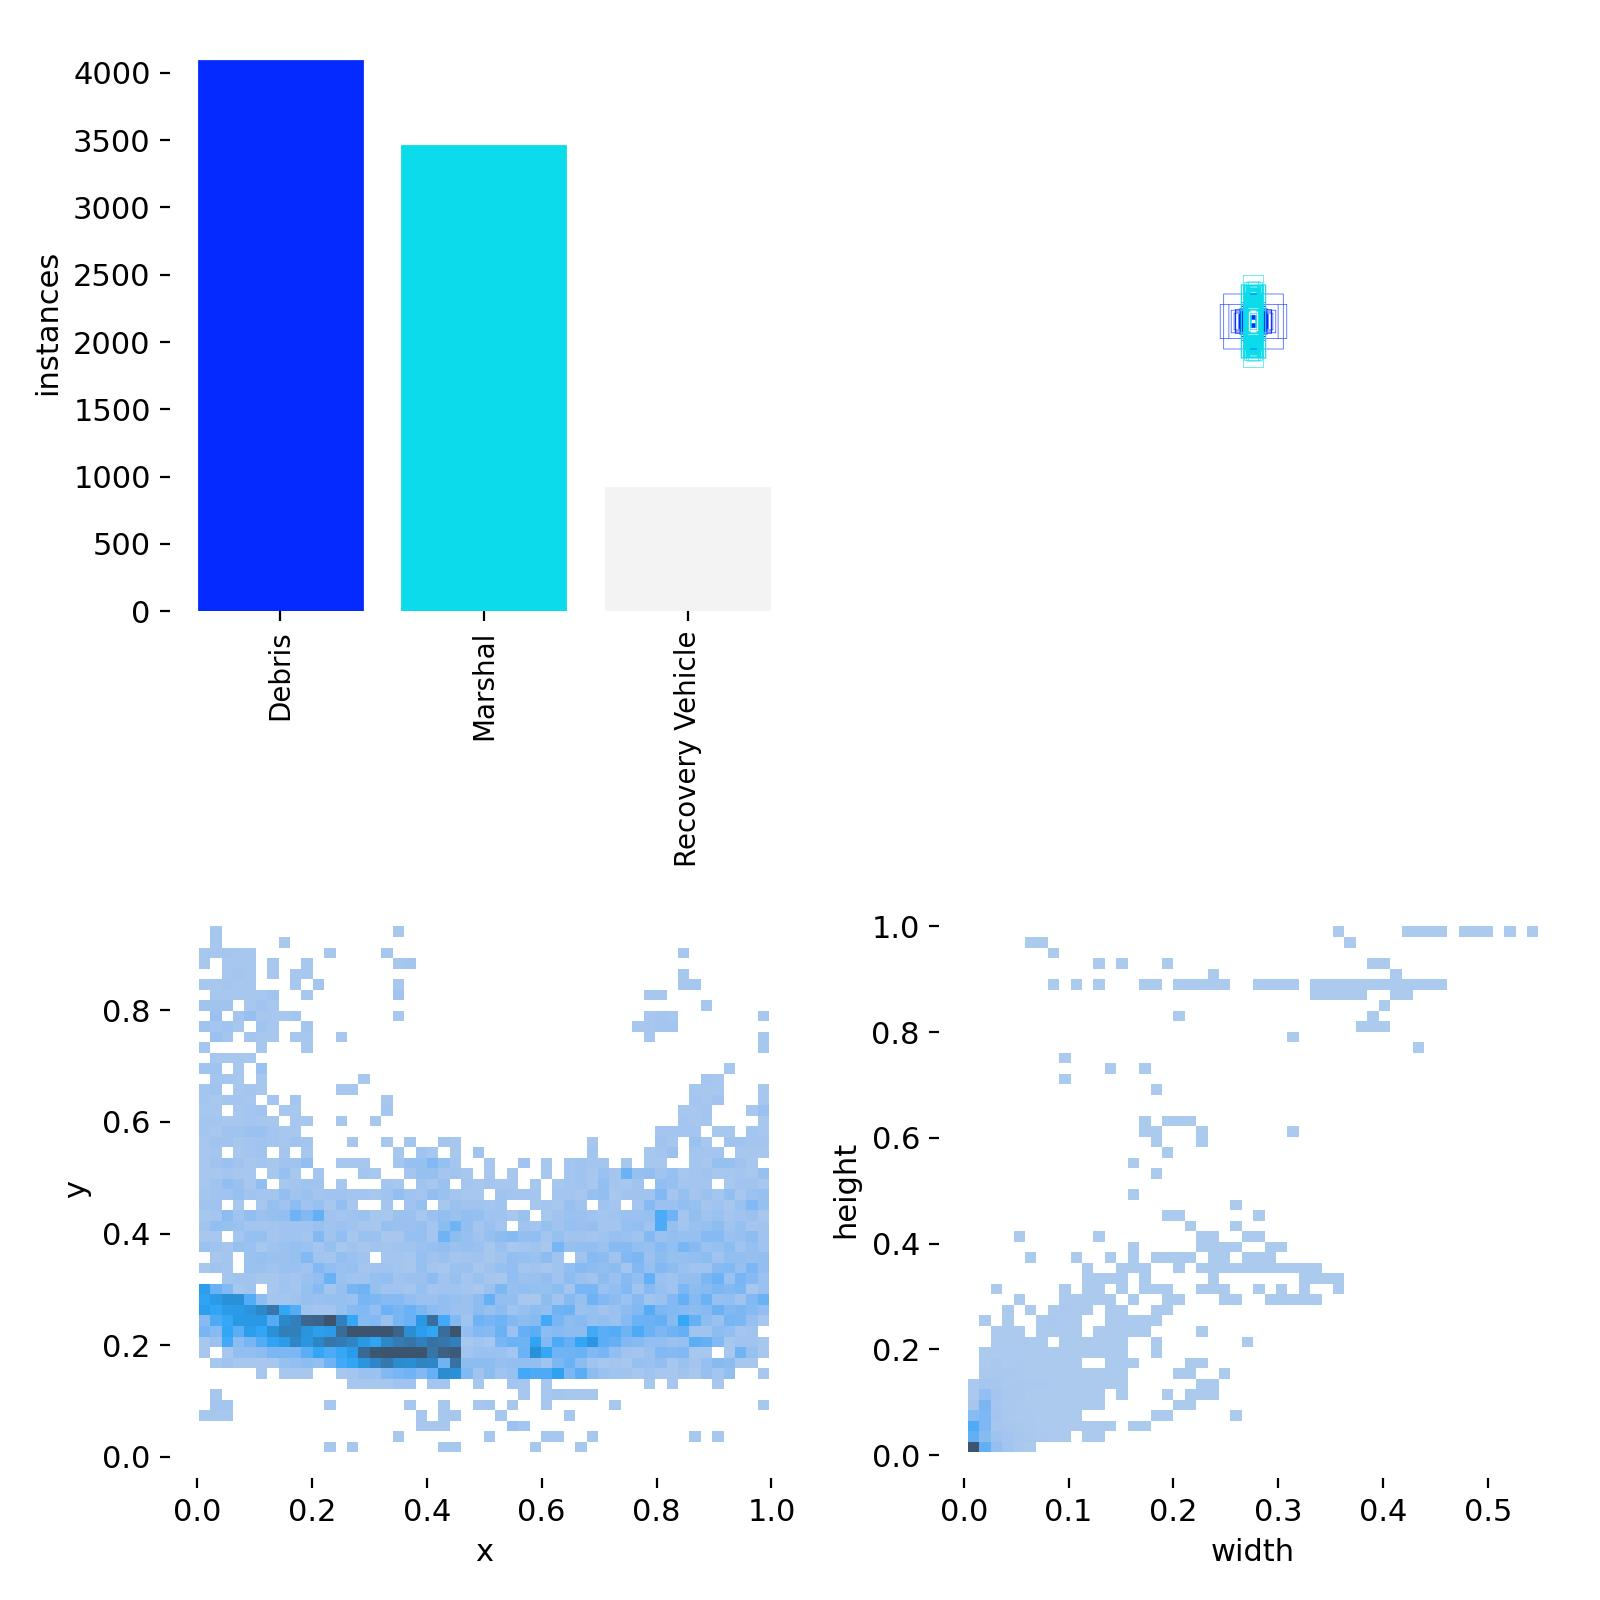

In [12]:
Image("/content/runs/detect/train/labels.jpg", width=600)

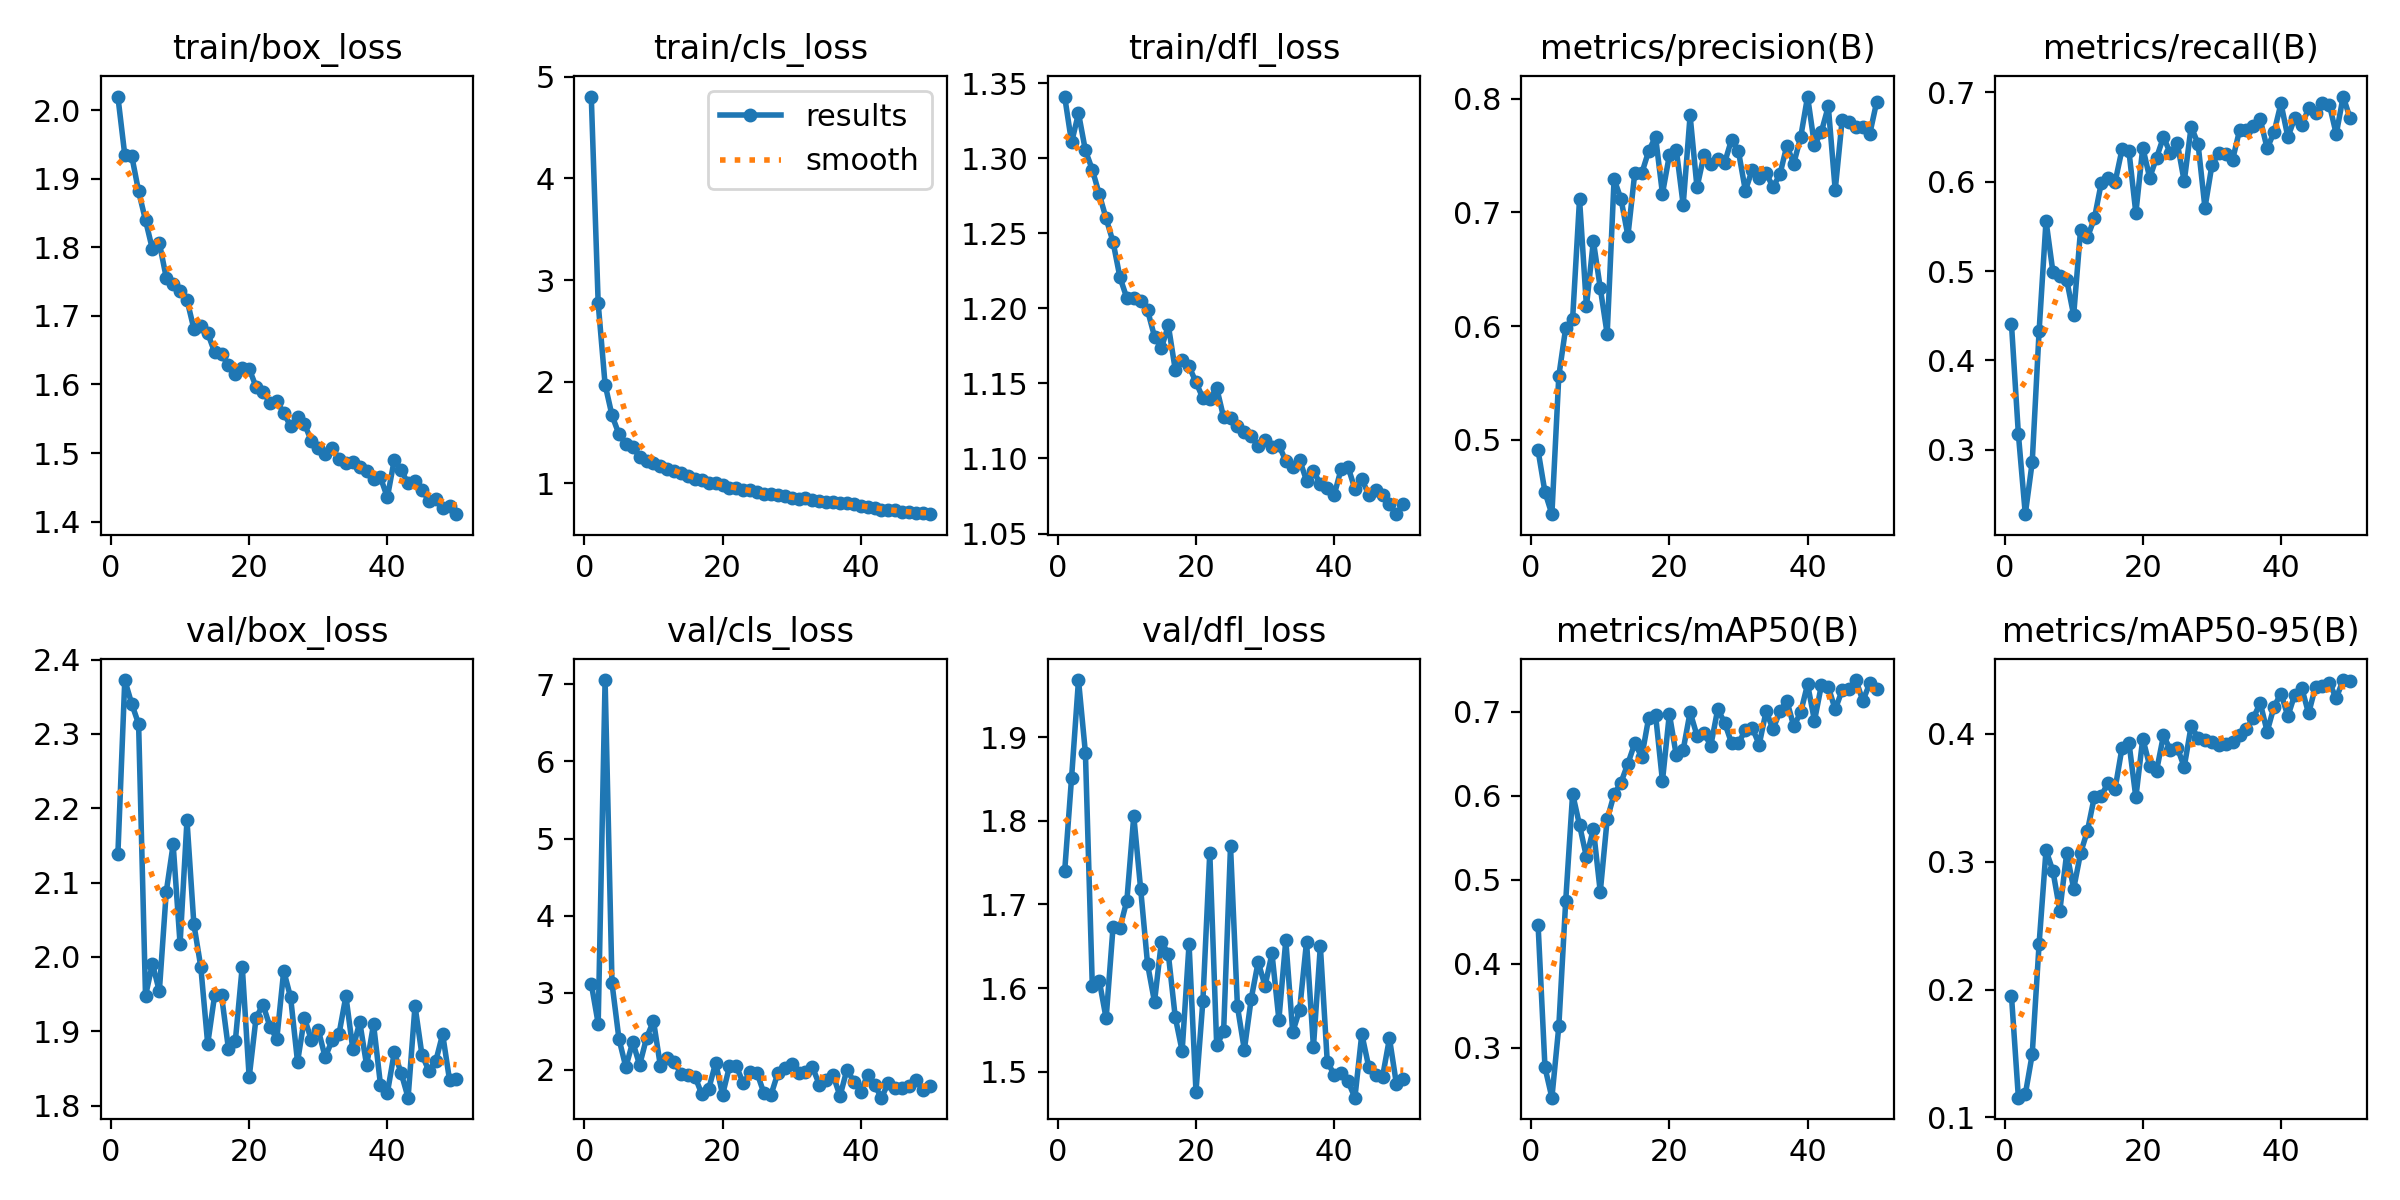

In [13]:
Image("/content/runs/detect/train/results.png", width=600)

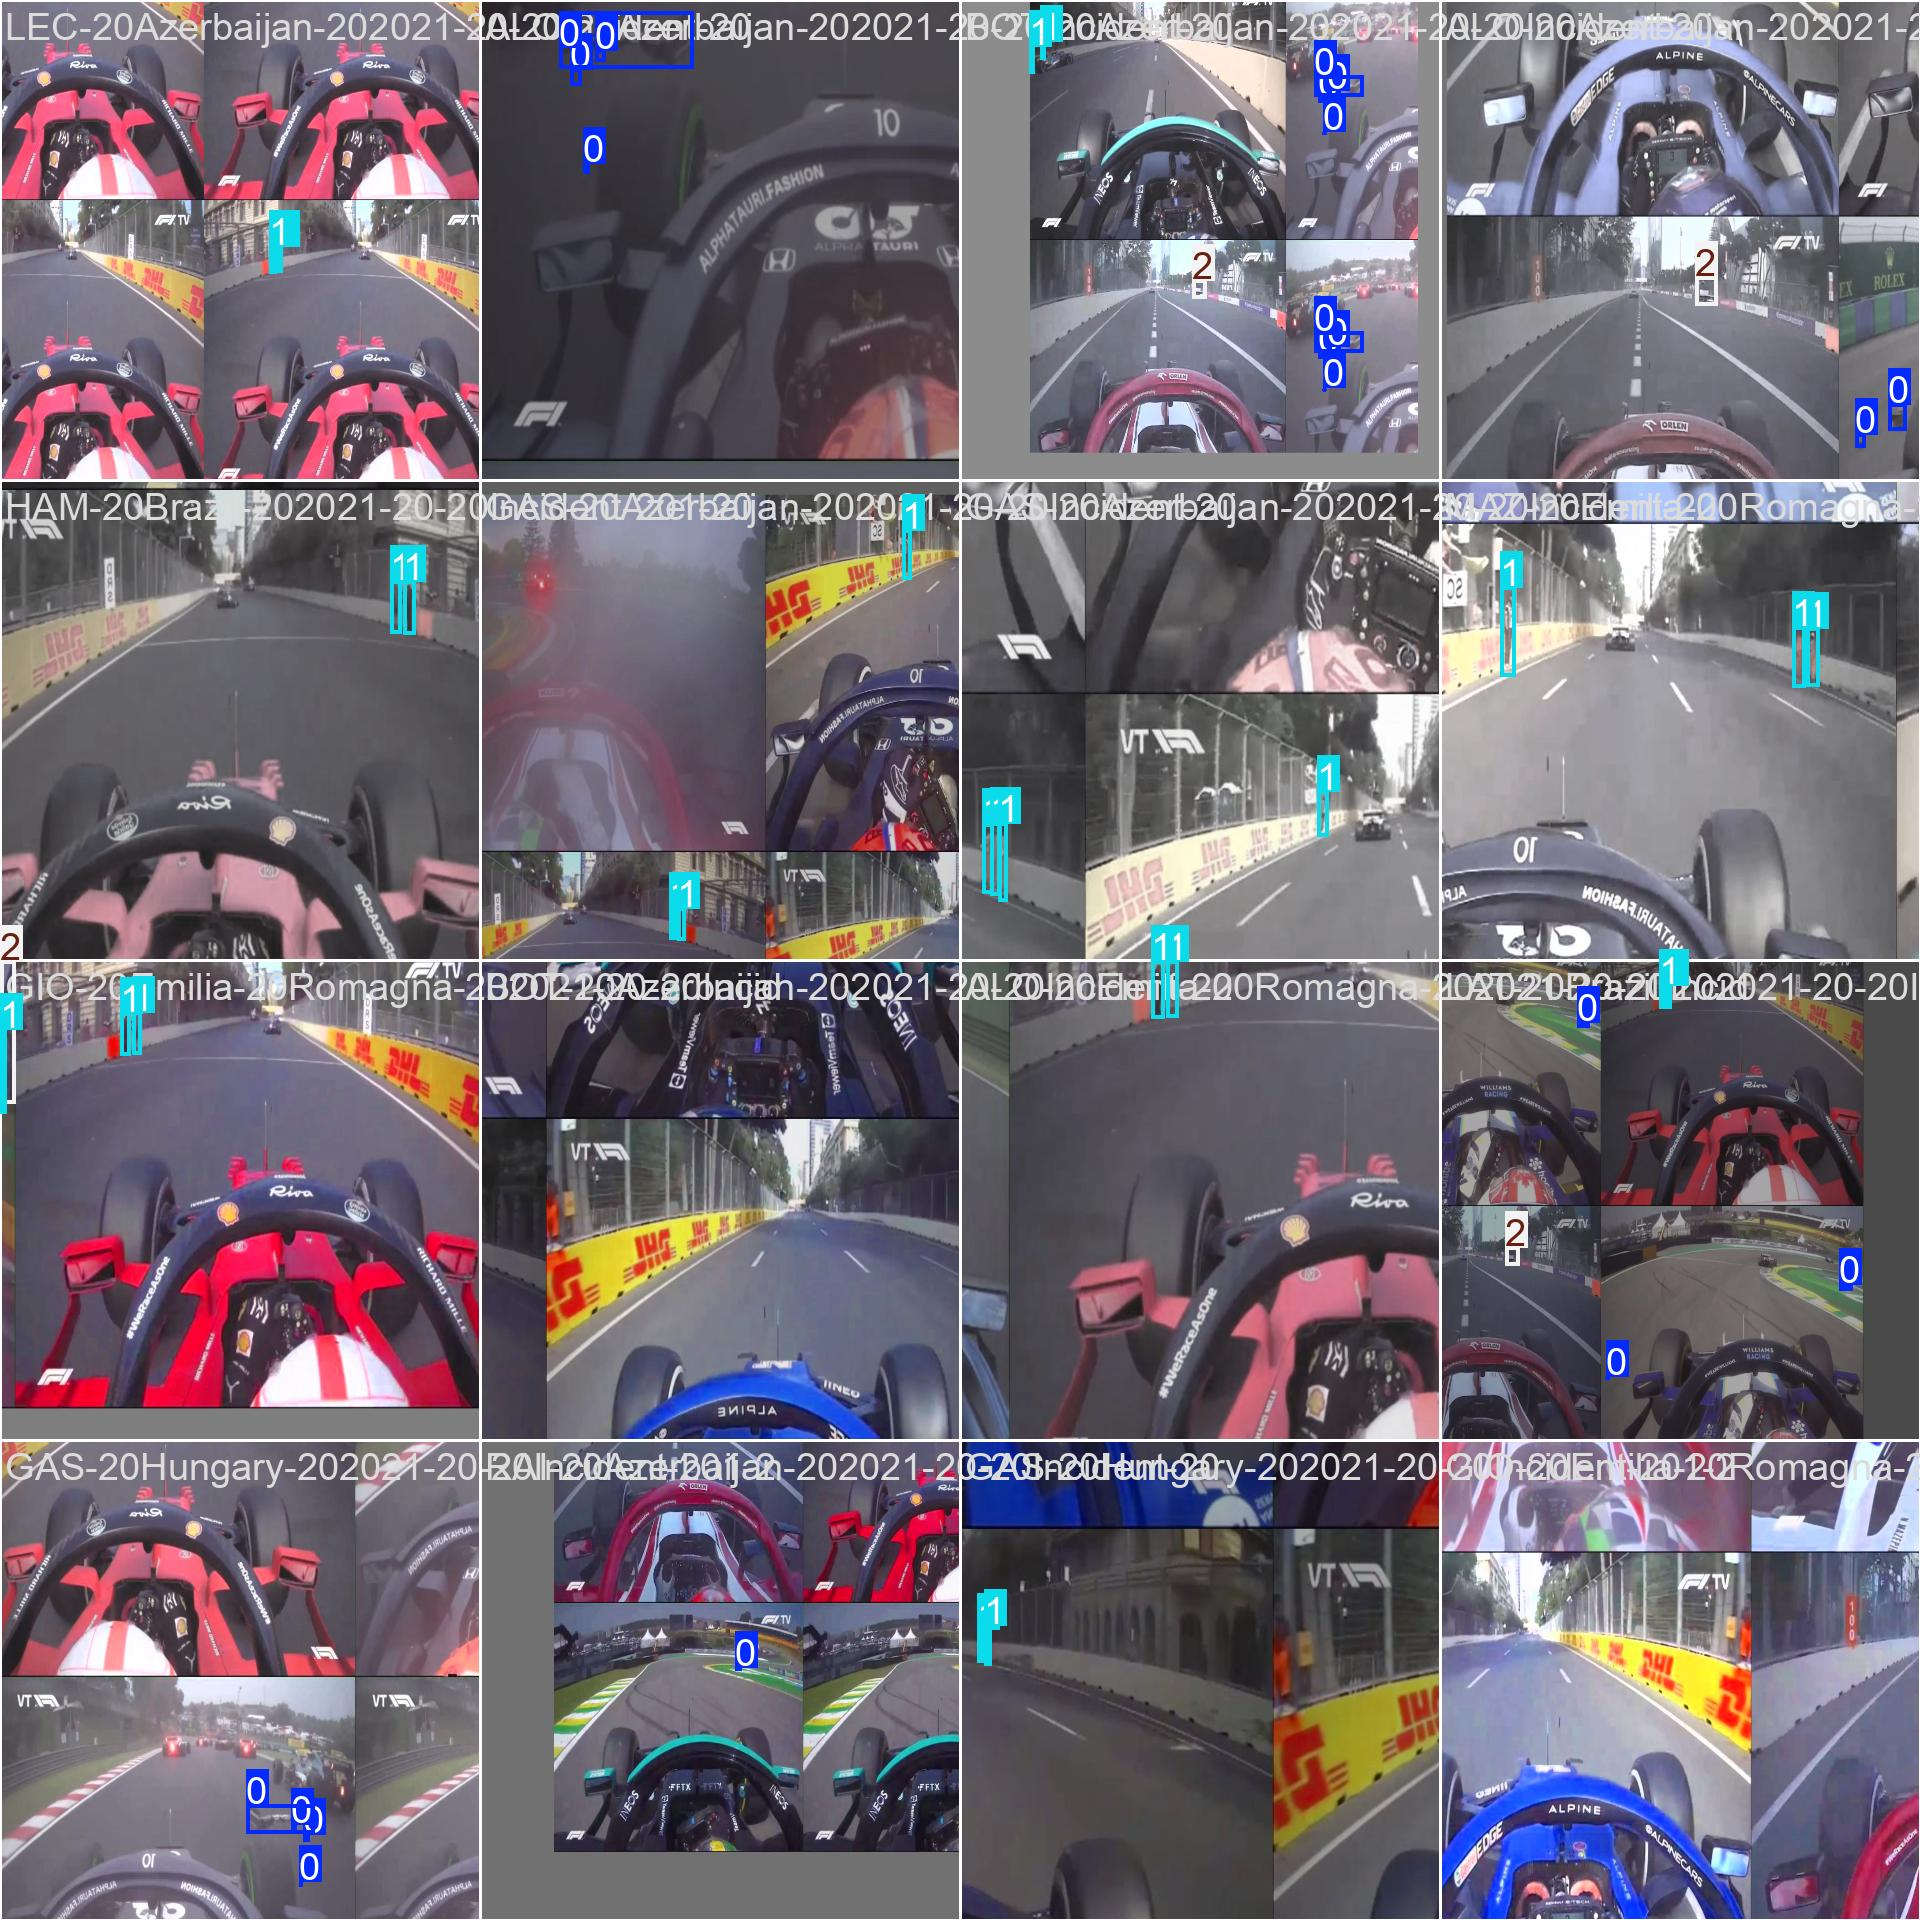

In [14]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

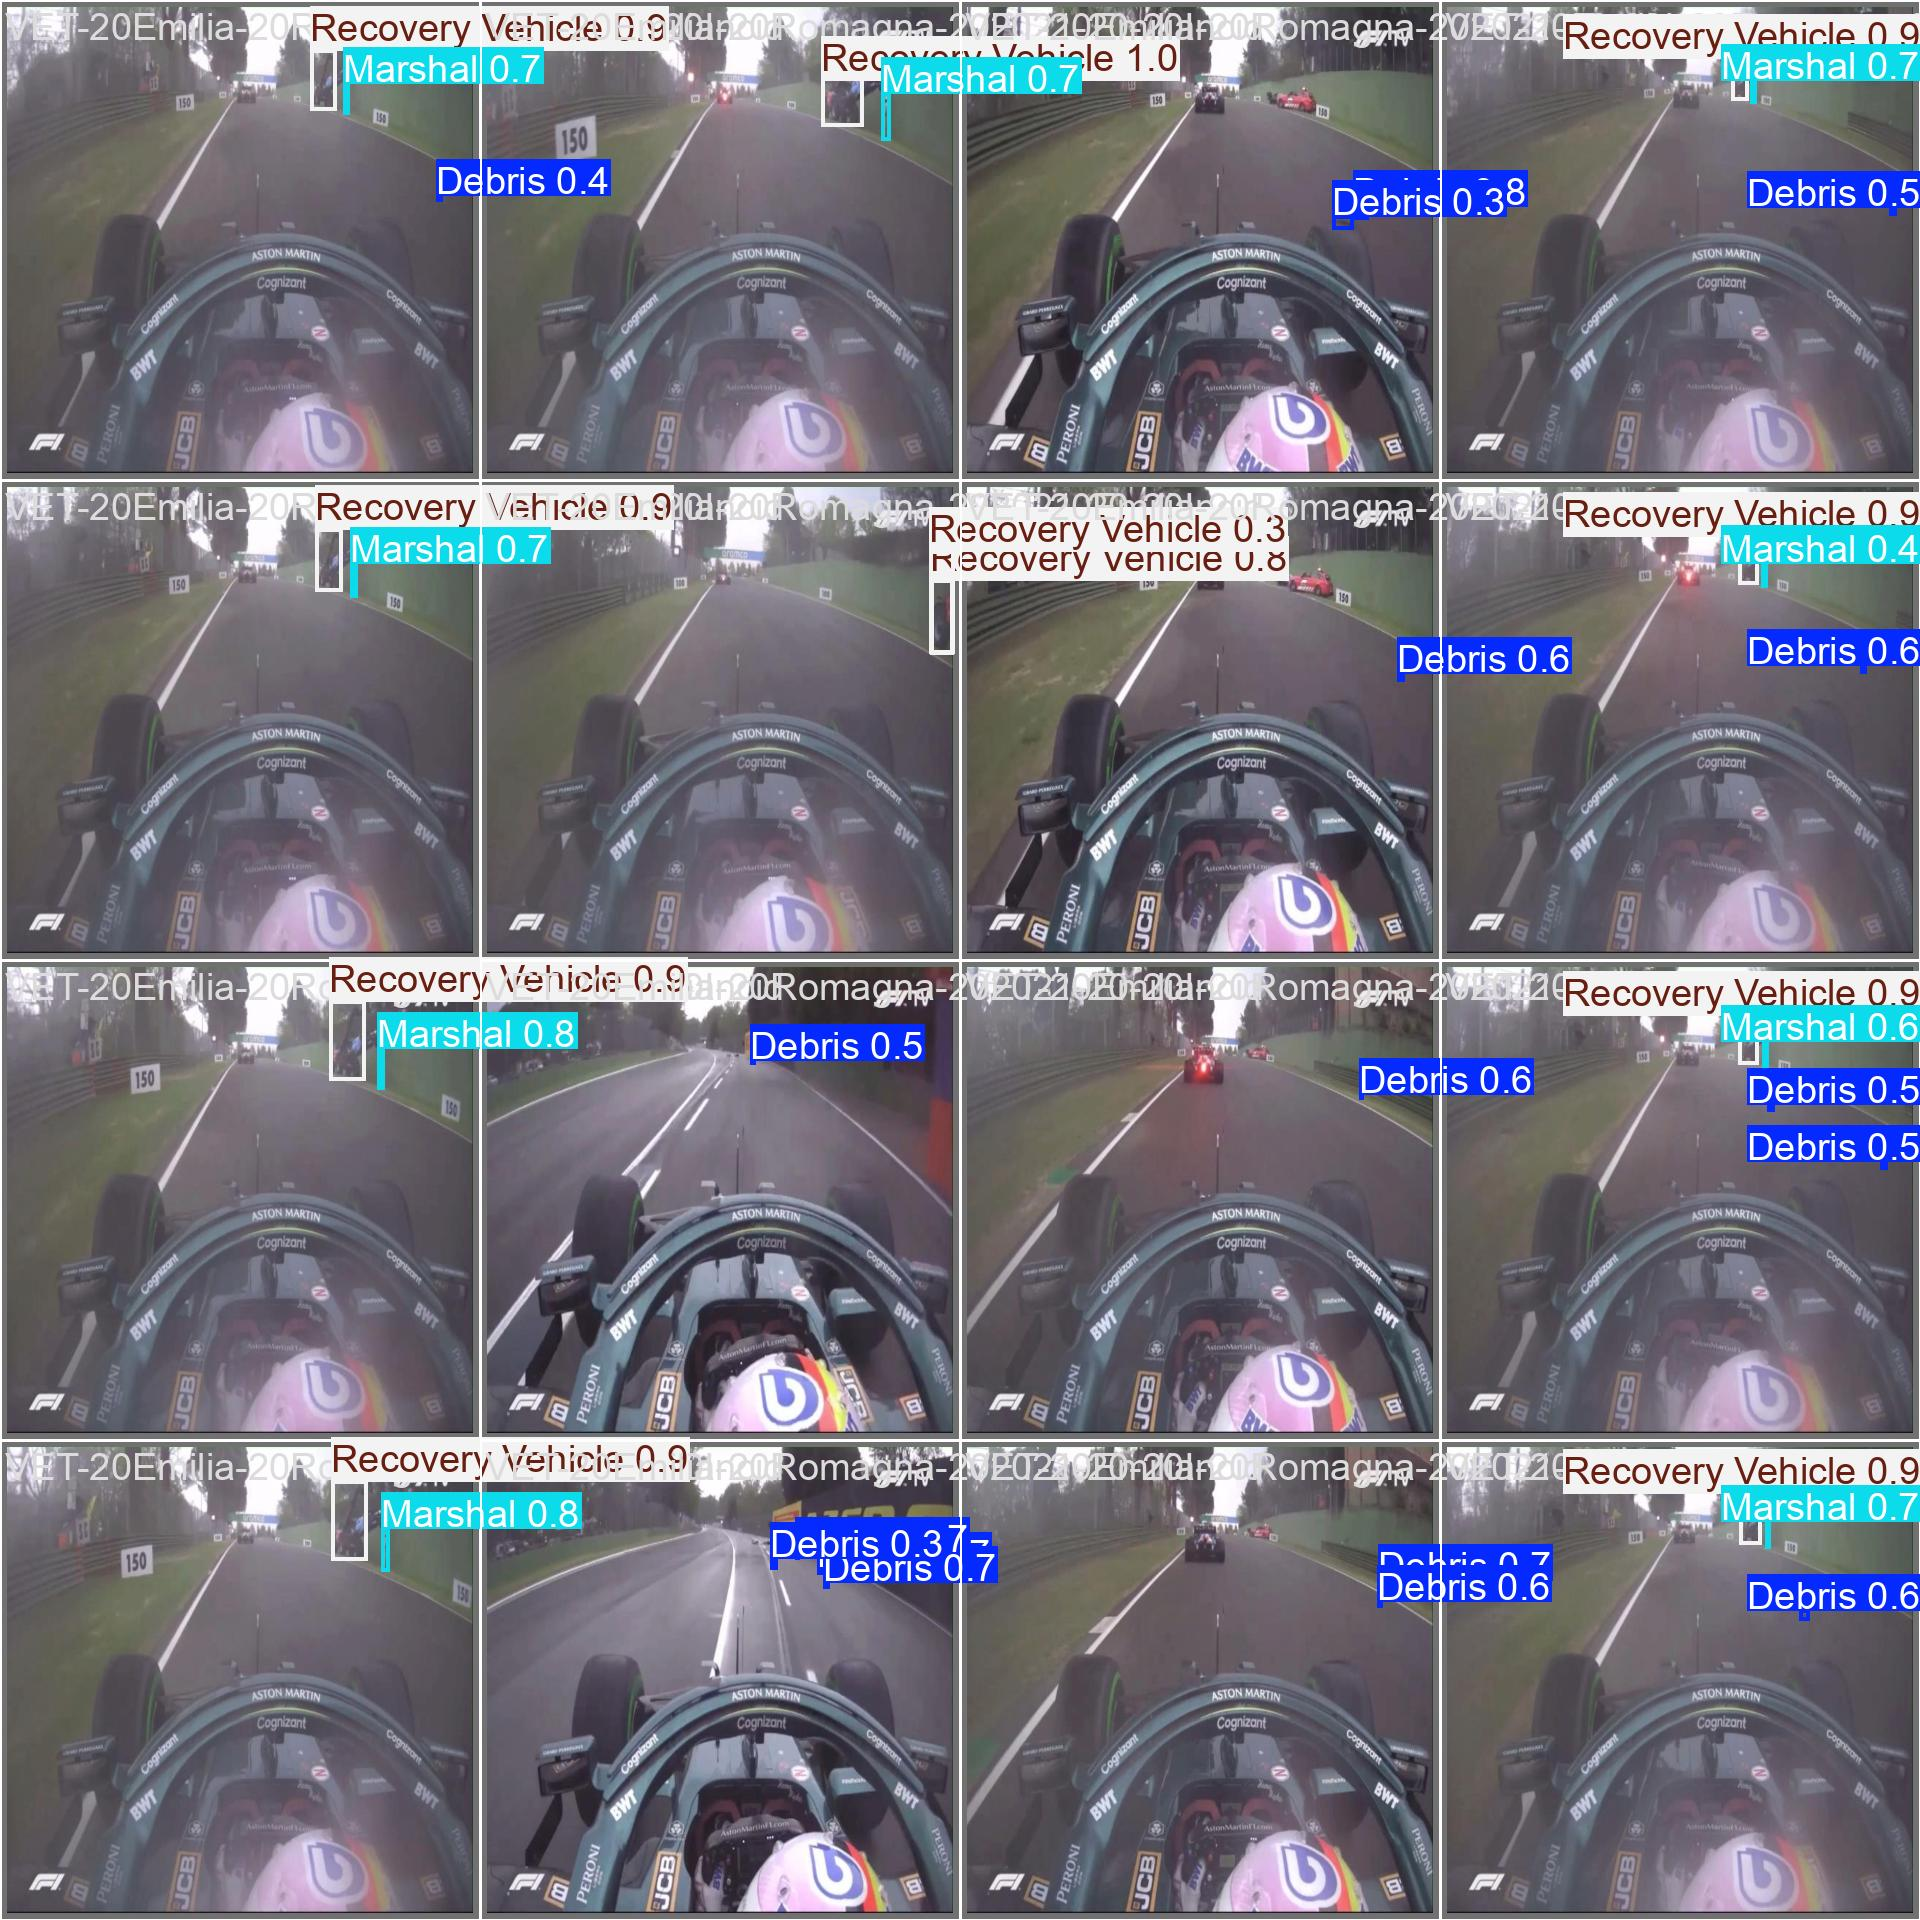

In [15]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

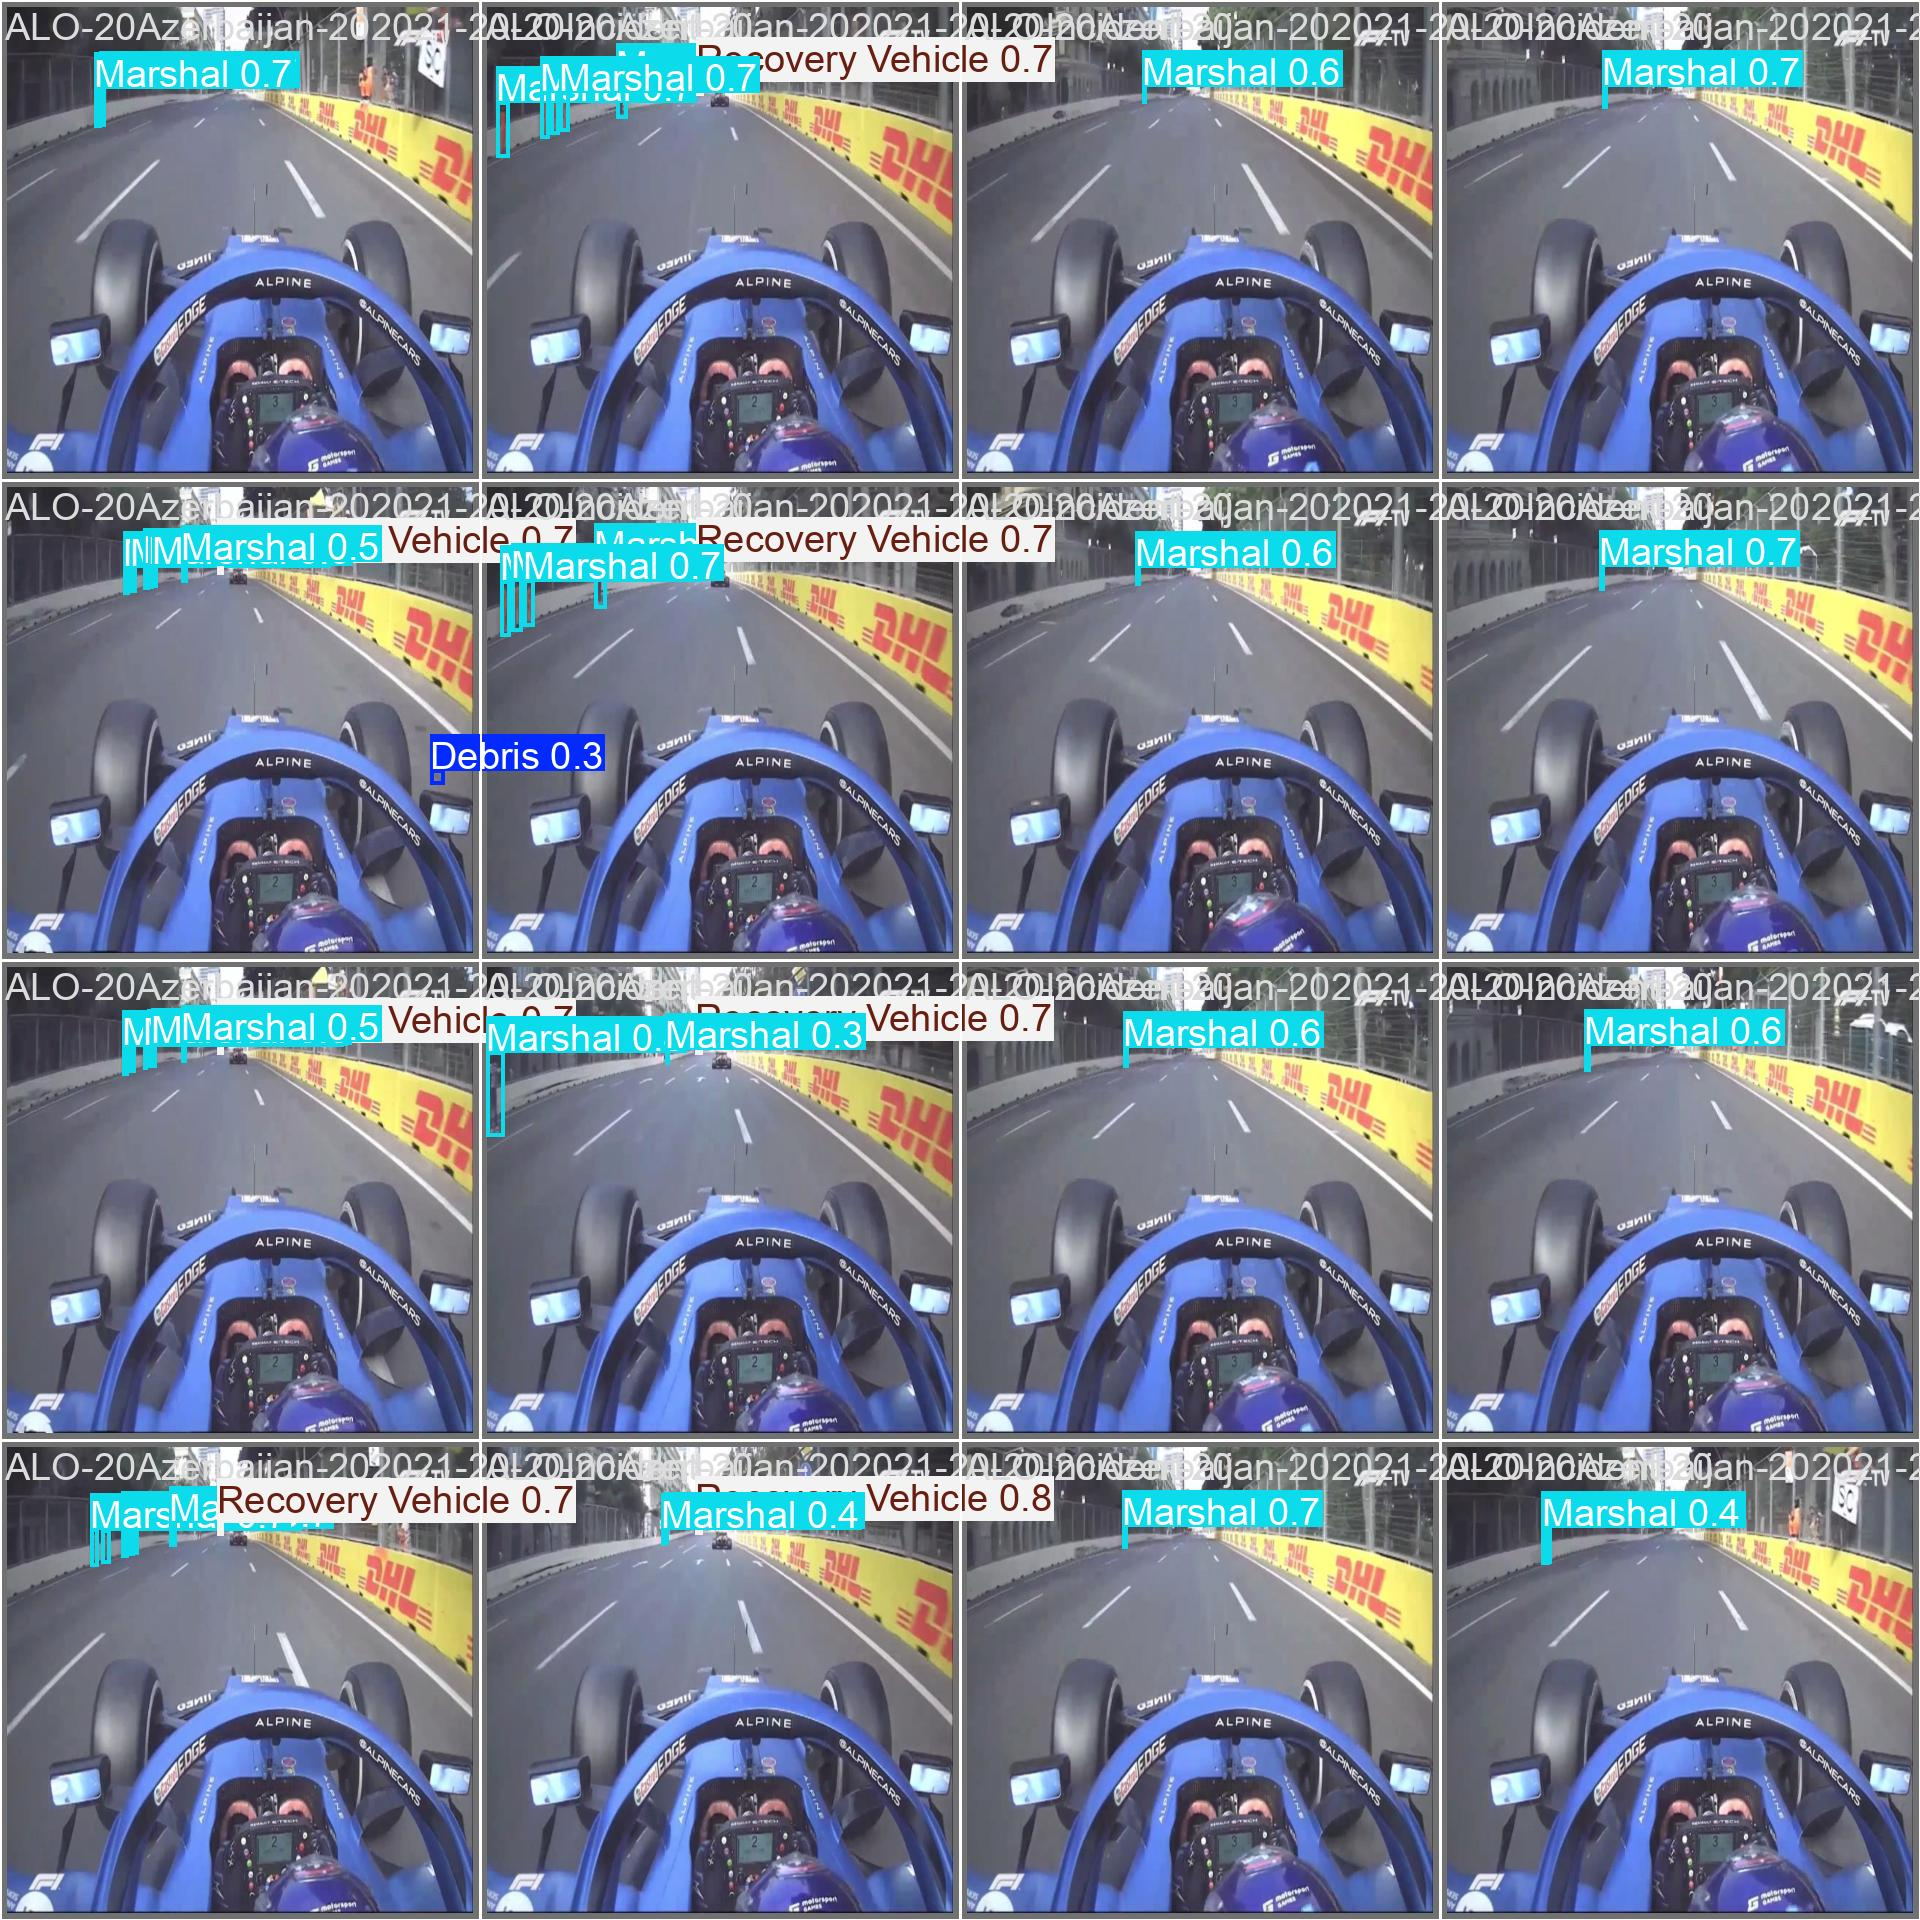

In [16]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

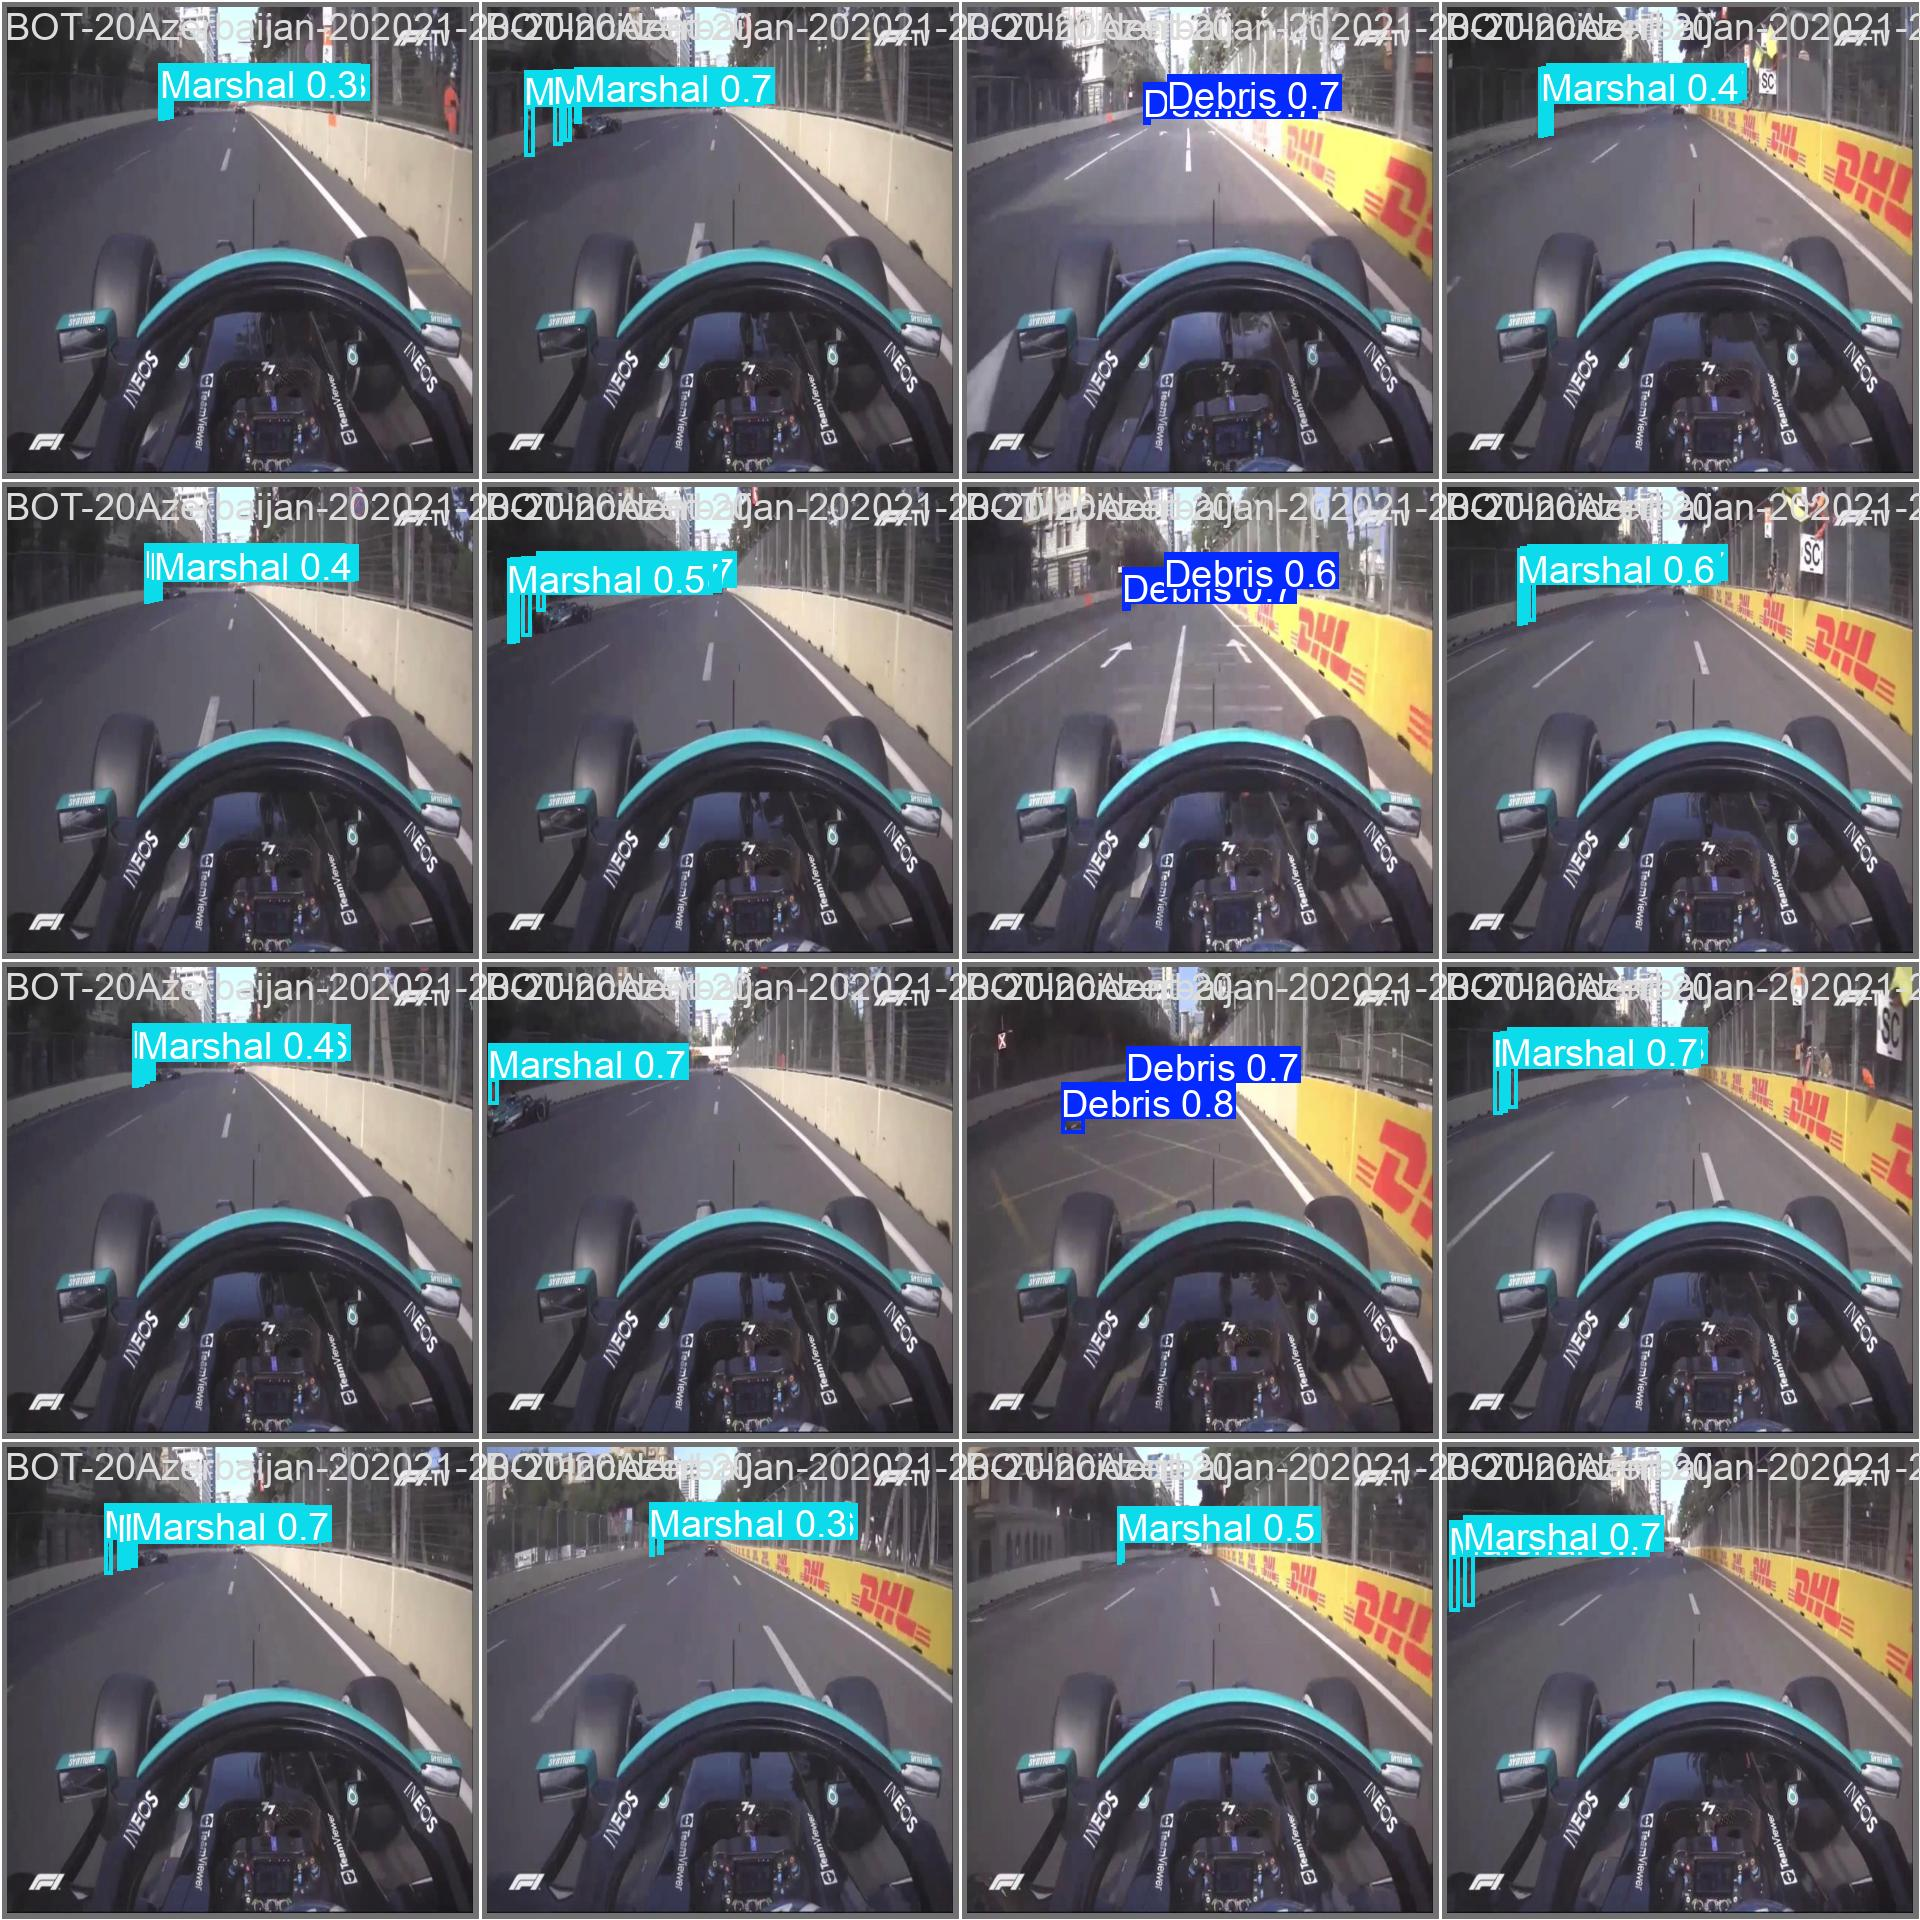

In [17]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 06 Download the Model Weights from the Google Drive**

In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=18liveibs-1SxsSRZHOZIV_TEf7AF02tI" #or you can find it from the left portion in weights

Downloading...
From: https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t
To: /content/best.pt
100% 5.47M/5.47M [00:00<00:00, 150MB/s]


**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Debris-Detection-5/valid/labels.cache... 1124 images, 0 backgrounds, 0 corrupt: 100% 1124/1124 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 71/71 [00:12<00:00,  5.91it/s]
                   all       1124       3162       0.77      0.667      0.701      0.415
                Debris        460       1924      0.675      0.391      0.457      0.172
               Marshal        585       1067      0.732      0.668      0.683      0.332
      Recovery Vehicle        171        171      0.903      0.942      0.963      0.741
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1124 /content/Debris-Detection-5/test/images/ALO-20Azerbaijan-202021-20-20Incident-201-20-Processed-20-1-mp4-t-6-5_jpg.rf.24599458fd645d356d642a16d7bee369.jpg: 640x640 1 Debris, 1 Marshal, 13.0ms
image 2/1124 /content/Debris-Detection-5/test/images/ALO-20Azerbaijan-202021-20-20Incident-201-20-Processed-20-1-mp4-t-6-666667_jpg.rf.cabfd850b46ba78b0271c101e58a9023.jpg: 640x640 1 Debris, 10.3ms
image 3/1124 /content/Debris-Detection-5/test/images/ALO-20Azerbaijan-202021-20-20Incident-201-20-Processed-20-1-mp4-t-7-333333_jpg.rf.3d97809befc06836518bf8d7b6399df0.jpg: 640x640 2 Debriss, 8.6ms
image 4/1124 /content/Debris-Detection-5/test/images/ALO-20Azerbaijan-202021-20-20Incident-201-20-Processed-20-1-mp4-t-8-533333_jpg.rf.f8d7494b861b97853d2a9b8aa27410f6.jpg: 640x640 3 Debriss, 8.2ms
image 5/1124 /content/Debris-Detecti

In [ ]:
!gdown "google drive custom file link" #your custom video file

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 76.1MB/s]


**Step # 08 Inference with Custom Model on Videos**

In [18]:
!gdown "google drive custom file link" # your custom drive link to the video

Downloading...
From: https://drive.google.com/uc?export=download&id=1FpLi1f3IH-HuOYLV8S95gmInFrfYiKwn
To: /content/f1spa.mp4
100% 75.0M/75.0M [00:01<00:00, 52.3MB/s]


In [19]:
!gdown "google drive custom file link"# your custom drive link to the video

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY] [--speed SPEED]
             [--no-cookies] [--no-check-certificate] [--continue] [--folder] [--remaining-ok]
             [--format FORMAT] [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: your custom drive link to the video


In [21]:
!yolo task=detect mode=predict model= best_hd.pt conf=0.25 source="f1spa.mp4" save=True # correctly write the name of the video

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 3376/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3377/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3378/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.4ms
video 1/1 (frame 3379/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3380/8376) /content/f1spa.mp4: 640x1088 1 Debris, 11.3ms
video 1/1 (frame 3381/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3382/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.4ms
video 1/1 (frame 3383/8376) /content/f1spa.mp4: 640x1088 1 Debris, 11.3ms
video 1/1 (frame 3384/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3385/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3386/8376) /content/f1spa.mp4: 640x1088 (no detections), 11.3ms
video 1/1 (frame 3387/8376) /content/f1spa.mp4: 640x1088 1 Debris, 11.3m

In [ ]:
#<<<<<<<<look left<<<<<<<# download from runs/predict/video name

In [23]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your video in Colab and the destination path in Drive
video_path = '/content/runs/detect/predict/f1spa.avi'  # Update this path with your actual video path
drive_path = '/content/drive/My Drive/f1spa.avi'  # Update this to your target folder

# Copy the video to Google Drive
shutil.copy(video_path, drive_path)

print("Video has been moved to Google Drive!")


Mounted at /content/drive
Video has been moved to Google Drive!
